# Regresión logística multiple
Dado que la función lineal no se puede ajustar a variables catagóricas binarias (0, 1), se hace necesario utilizar la función sigmoide $\sigma(y)$:

$\large{\sigma(y)=\frac{1}{1+e^{-y}}}$

Cuando $y$ toma valores positivos muy grandes, $e^{-y}$ toma volores muy cercanos a cero, lo que ocasiona que la función $\sigma(y)$ tome valores muy cercanos a $1$. Por el contrario, cuando $y$ toma valores negativos muy grandes, $e^{-y}$ toma volores muy cercanos a $+\infty$, lo que ocasiona que la función $\sigma(y)$ tome valores muy cercanos a $0$

Probabilidad de $y$ dado $X$:

$\large{P(y=1|X=x)=\frac{e^{\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p}}}{1+e^{-(\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p})}}}$

La regresión logística calcula los logaritmos de las probabilidades de cada variable para transformarlas en 0 o 1, usando un umbral de decisión.

Se conoce como probabilidad de *odds* a la razón entre la probabilidad de aciertos y desaciertos:

$\large{odds = \frac{P(y=1|X;\theta)}{P(y=0|X;\theta)}}$

entonces,

$\large{\ln{\frac{P(y=1|X;\theta)}{P(y=0|X;\theta)}}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p}}$

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Leer el dataset final generado por el notebook M02_05
url = 'https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%202/Datasets/DataReg.csv'
df = pd.read_csv(url, header = 0)

In [8]:
df.head()

,precio,area_resid,cal_aire,num_hab,edad,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,Vendida,prom_dist,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y rio,cuerpo_agua_Rio
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


## Creación de los set de entrenamiento y validación, modelado

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
X = df.loc[:, df.columns != 'Vendida']
y = df['Vendida']

In [11]:
# Obtener los cuatro conjuntos de datos necesarios para el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [12]:
# Crear el modelo aumentando las iteraciones dado que no se llega
# a ajustar el modelo con menos iteraciones
reg_model = LogisticRegression(max_iter = 900)

In [13]:
# Ajustar el modelo a los datos
reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=900)

In [14]:
# Intercepto theta(0)
reg_model.intercept_

array([-2.67910644])

In [15]:
# Coeficiente de las variables predictoras
reg_model.coef_.reshape(-1,4)

array([[-0.2656961 ,  0.01086472, -1.38371538,  0.98830839],
       [-0.00402203,  0.30360361, -0.21857159,  0.19075335],
       [-0.07170099, -0.0097345 , -0.05253779, -0.32562462],
       [-0.21087867, -0.0351414 , -0.04254725,  0.39430661]])

In [16]:
# Realizar las predicciones en el conjunto de validación
y_pred = reg_model.predict(X_test)

In [17]:
# Convertir las predicciones a valores booleanos y 
# Ver las dos salidas para compararlas visualmente
y_pred.astype(bool), y_test.to_numpy().astype(bool)

(array([ True,  True, False, False, False,  True, False,  True, False,
        False,  True,  True, False,  True, False,  True, False, False,
        False,  True, False, False, False, False, False,  True,  True,
        False,  True,  True, False,  True,  True, False,  True, False,
         True,  True, False, False, False, False, False, False, False,
         True,  True,  True, False,  True,  True, False, False, False,
         True,  True, False, False, False, False,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True, False,  True,
        False, False,  True, False,  True, False,  True, False,  True,
         True,  True, False, False,  True,  True,  True, False,  True,
         True,  True, False,  True, False,  True, False, False,  True,
         True, False, False]),
 array([ True,  True, False,  True,  True,  True,  True, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False,  True, False, False, Fal

In [18]:
# Cargar modulos y funciones para desarrollar la matriz de confusión
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test,y_pred)

array([[36, 20],
       [16, 30]], dtype=int64)

In [20]:
# Formatear la matriz de confusión como un dataframe
mc = pd.DataFrame(confusion_matrix(y_test,y_pred), index = ['No vendidaR','VendidaR'], columns = ['No vendidaP', 'VendidaP'])
mc

,No vendidaP,VendidaP
No vendidaR,36,20
VendidaR,16,30


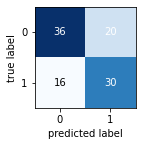

In [23]:
# Utilizar un modulo y función para dibujar mejor la matriz de confusión
#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6,6), show_normed=False)
plt.tight_layout(pad = 15)

![Matriz de confusión](confmat.png)
![Metricas](metricas.jpg)

**Precision:** mide la calidad de los modelos de ML en el desarrollo de la clasificación, para el problema nos indica que porcentaje de propiedades serán vendidas o no.

**Recall (Exhaustividad):** muestra la proporción de ejemplos que el modelo es capaz de identificar, indica que porcentaje de propiedades de las que serán vendidas o no podemos indentificar.

**Accuracy (Exactitud):** mide el porcentaje de los casos en que el modelo ha acertado, no debe interpretarse sola porque es una de las métricas que nos puede llevar a tomar decisiones incorrectas porque nos puede indicar que un modelo deficiente parezca mejor de lo que en realidad es.

**Sensibilidad:** detecta en la realidad los casos positivos, representa la probabilidad de los verdaderos positivos en la predicción.

$Sensibilidad=\frac{TP}{TP+FN}$

**Especificidad:** detecta en la realidad los casos negativos, representa la probabilidad de los verdaderos negativos en la predicción.

In [24]:
# Importar los modulos para agregar la columna de valores de unos y del modelo
# Logit con el fin de obtener las salidas con pruebas estadísticas
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm

In [25]:
# Crear la columna con la constante solicitada para el modelo Logit
const_X = sn.add_constant(X_train)

In [26]:
const_X

,const,precio,area_resid,cal_aire,num_hab,edad,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,prom_dist,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y rio,cuerpo_agua_Rio
203,1.0,48.5,32.68,0.4161,7.853,33.2,25.3,3.81,8.770,11.3880,22,0.040933,5.1175,0,0,0,0
441,1.0,17.1,48.10,0.7400,6.406,97.2,19.8,19.52,9.242,15.1368,58,0.077408,2.0675,1,0,1,0
172,1.0,23.1,34.05,0.5100,5.572,88.5,23.4,14.69,9.362,12.1848,38,0.052950,2.5975,0,0,0,1
95,1.0,28.4,32.89,0.4450,6.625,57.8,22.0,6.65,9.968,14.2272,46,0.046627,3.4950,0,0,0,1
54,1.0,18.9,34.00,0.4100,5.888,47.6,18.9,14.80,8.678,15.1512,55,0.038684,7.3175,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1.0,43.8,32.89,0.4450,7.820,36.9,22.0,3.57,10.876,10.3504,25,0.051130,3.4975,1,0,1,0
476,1.0,16.7,48.10,0.6140,6.484,93.6,19.8,18.68,6.134,14.1336,22,0.056696,2.3025,1,0,0,1
322,1.0,20.4,37.38,0.4930,6.041,49.9,20.4,7.70,8.908,13.1632,40,0.045675,4.7225,0,0,0,0
382,1.0,11.3,48.10,0.7000,5.536,100.0,19.8,23.60,8.226,11.0904,46,0.060650,1.5775,1,0,0,1


In [27]:
# Crear y ajustar el modelo utilizando Logit
logit = sm.Logit(y_train, const_X).fit()

Optimization terminated successfully.
         Current function value: 0.541711
         Iterations 6


In [29]:
# Ver estadisticos y los valores de los parámetros de las variables predictoras
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      387
Method:                           MLE   Df Model:                           16
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.2140
Time:                        14:46:16   Log-Likelihood:                -218.85
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 8.008e-18
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.9938      3.026     -0.989      0.323      -8.926       2.938
precio                    -0.2954      0.039     -7.586      0.000      -0.372      -0.219
area_resid                 0.0377      0.030      1.266      0.205      -0.021       0.096
cal_aire                 -10.0015      3.075     -3.253      0.001     -16.027      -3.975
num_hab                    1.1678      0.318      3.675      0.000       0.545       1.791
edad                   -9.471e-06      0.008     -0.001      0.999      -0.015       0.015
prof_mil                   0.3761      0.075      5.034      0.000       0.230       0.523
p-pobreza                 -0.2184      0.039     -5.560      0.000      -0.295      -0.141
n_cam_hos                  0.1842      0.082      2.241      0.025       0.023       0.345
n_hab_hotel               -0.0693      0.054     -1.286      0.198      -0.175       0.036
lluvia_ano                -0.0067      0.010     -0.684      0.494      -0.026       0.012
parque                    37.6171     28.183      1.335      0.182     -17.620      92.854
prom_dist                 -0.4465      0.111     -4.023      0.000      -0.664      -0.229
aeropuerto_SI             -0.2739      0.240     -1.139      0.255      -0.745       0.197
cuerpo_agua_Lago          -0.0776      0.343     -0.226      0.821      -0.751       0.596
cuerpo_agua_Lago y rio    -0.0395      0.394     -0.100      0.920      -0.811       0.732
cuerpo_agua_Rio            0.4638      0.293      1.582      0.114      -0.111       1.039
==========================================================================================
"""

In [30]:
# Se eliminan los atributos con valores por encima de
# la significancia de los parámetros
columnas = ['edad', 'cuerpo_agua_Lago', 'cuerpo_agua_Lago y rio']

const_X = const_X.drop(columns = columnas)

logit1 = sm.Logit(y_train, const_X).fit()
logit1.summary()

Optimization terminated successfully.
         Current function value: 0.541775
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                           13
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.2139
Time:                        14:52:15   Log-Likelihood:                -218.88
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 3.037e-19
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9990      3.021     -0.993      0.321      -8.919       2.921
precio             -0.2955      0.039     -7.601      0.000      -0.372      -0.219
area_resid          0.0377      0.030      1.270      0.204      -0.020       0.096
cal_aire           -9.9819      3.046     -3.277      0.001     -15.953      -4.011
num_hab             1.1673      0.310      3.763      0.000       0.559       1.775
prof_mil            0.3751      0.074      5.040      0.000       0.229       0.521
p-pobreza          -0.2192      0.038     -5.836      0.000      -0.293      -0.146
n_cam_hos           0.1829      0.082      2.243      0.025       0.023       0.343
n_hab_hotel        -0.0695      0.054     -1.294      0.196      -0.175       0.036
lluvia_ano         -0.0068      0.010     -0.699      0.484      -0.026       0.012
parque             37.8543     28.155      1.345      0.179     -17.328      93.036
prom_dist          -0.4467      0.103     -4.339      0.000      -0.648      -0.245
aeropuerto_SI      -0.2759      0.239     -1.152      0.249      -0.745       0.193
cuerpo_agua_Rio     0.4971      0.246      2.024      0.043       0.016       0.979
===================================================================================
"""

In [31]:
# Seguir eliminando atributos o parámetros que no aportan al modelo
columnas = ['lluvia_ano', 'area_resid', 'aeropuerto_SI']

const_X = const_X.drop(columns = columnas)

logit2 = sm.Logit(y_train, const_X).fit()
logit2.summary()

Optimization terminated successfully.
         Current function value: 0.546263
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                           10
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.2074
Time:                        14:53:31   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 4.189e-20
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4747      2.656     -0.555      0.579      -6.680       3.730
precio             -0.3014      0.039     -7.747      0.000      -0.378      -0.225
cal_aire           -9.2258      2.962     -3.115      0.002     -15.030      -3.421
num_hab             1.1390      0.307      3.706      0.000       0.537       1.741
prof_mil            0.3570      0.072      4.982      0.000       0.217       0.497
p-pobreza          -0.2163      0.037     -5.854      0.000      -0.289      -0.144
n_cam_hos           0.1809      0.081      2.237      0.025       0.022       0.339
n_hab_hotel        -0.0743      0.057     -1.313      0.189      -0.185       0.037
parque             38.8342     27.889      1.392      0.164     -15.826      93.495
prom_dist          -0.4795      0.099     -4.822      0.000      -0.674      -0.285
cuerpo_agua_Rio     0.4775      0.244      1.960      0.050    2.13e-05       0.955
===================================================================================
"""

In [32]:
# Seguir eliminando atributos o parámetros que no aportan al modelo
columnas = ['n_hab_hotel', 'parque']

const_X = const_X.drop(columns = columnas)

logit3 = sm.Logit(y_train, const_X).fit()
logit3.summary()

Optimization terminated successfully.
         Current function value: 0.551369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Aug 2021   Pseudo R-squ.:                  0.2000
Time:                        14:54:08   Log-Likelihood:                -222.75
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 2.015e-20
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9879      2.507     -0.793      0.428      -6.902       2.926
precio             -0.3023      0.039     -7.779      0.000      -0.378      -0.226
cal_aire           -6.0062      1.824     -3.293      0.001      -9.581      -2.432
num_hab             1.1296      0.305      3.703      0.000       0.532       1.727
prof_mil            0.3584      0.072      5.001      0.000       0.218       0.499
p-pobreza          -0.2171      0.037     -5.875      0.000      -0.290      -0.145
n_cam_hos           0.1761      0.081      2.187      0.029       0.018       0.334
prom_dist          -0.4856      0.100     -4.880      0.000      -0.681      -0.291
cuerpo_agua_Rio     0.4876      0.242      2.016      0.044       0.014       0.962
===================================================================================
"""

## Rendimiento del modelo

In [33]:
# Crear una lista con los valores de los atributos finales del modelo logit3
col_final = ['precio', 'cal_aire', 'num_hab', 'prof_mil', 'p-pobreza', 'n_cam_hos', 'prom_dist', 'cuerpo_agua_Rio']

In [34]:
# Agregar columna de la constante de unos para poder aplicar el modelo Logit
# al conjunto de validación
X_test = sn.add_constant(X_test[col_final])
y_pred_train = logit3.predict(const_X)
y_pred_train

203    0.048505
441    0.292603
172    0.582527
95     0.773022
54     0.121675
         ...   
98     0.149341
476    0.522887
322    0.651095
382    0.447391
365    0.019508
Length: 404, dtype: float64

In [35]:
# Como las predicciones están dadas en probabilidades se convierten
# a uno las que esten por encima de 0.5, de lo contrario la clase es 0
# Se utiliza una función lambda que devuelve 1 si el valor es mayor a 0.5
# o cero si es menor o igual a este umbral
y_pred_train = y_pred_train.apply(lambda x: 1 if x > 0.5 else 0)
y_pred_train

203    0
441    0
172    1
95     1
54     0
      ..
98     0
476    1
322    1
382    0
365    0
Length: 404, dtype: int64

In [36]:
# Realizar las predicciones en el conjunto de validación
y_pred_test = logit3.predict(X_test)

In [37]:
# Convertir la predicción a ceros y unos
y_pred_test = y_pred_test.apply(lambda x: 1 if x > 0.5 else 0)

In [38]:
y_pred_test

410    1
85     1
280    0
422    0
199    0
      ..
229    0
159    1
196    1
345    0
467    0
Length: 102, dtype: int64

### Exactitud *(Accuracy)*

In [39]:
# Modulo para realizar la métrica de la exactitud
from sklearn.metrics import accuracy_score 

In [40]:
# Calcular la exactitud en el conjunto de entrenamien y validación,
# comparando el valor real vs el predicho
accuracy_ent = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Exactitud del modelo con datos de entrenamiento: ', accuracy_ent)
print('Exactitud del modelo con datos de validación: ', accuracy_test)

Exactitud del modelo con datos de entrenamiento:  0.6856435643564357
Exactitud del modelo con datos de validación:  0.6372549019607843


Los datos de la métrica de exactitud anteriores son para el modelo creado con Logit.

El modelo predice correctamente cerca del 63,72% de las instancias del conjunto de validación, es un modelo con rendimiento regular que puede ser utilizado para hacer predicciones en escenarios donde el costo de los falsos positivos o falsos negativos no representen la toma de decisiones que tienen una alta repercusión o se asuman riesgos vitales.

### Matriz de confusión para el modelo Logit

In [42]:
# Para los datos de entrenamiento
confusion_matrix(y_train, y_pred_train)

array([[155,  65],
       [ 62, 122]], dtype=int64)

In [43]:
# Para los datos de validación
confusion_matrix(y_test, y_pred_test)

array([[36, 20],
       [17, 29]], dtype=int64)

Como se puede ver la matriz de confusión del modelo logit3 es muy similar a la desarrollada con Scikitlearn, con una diferencia de un solo atributo, lo cual quiere decir que el modelo de Scikitlearn desarrolla un proceso de regularización sin la intervención del analista.

In [44]:
# Si se desea trabajar con las probabilidades de sklearn se usa la función predic_proba()
# e igualmente se puede manipular el umbral de decisión de la clase.
# En el siguiente código el umbrar para predecir uno se da a partir de 0.3
y_pred_sk = (reg_model.predict_proba(X_train[col_final])[:, 1]>0.3) # Columna uno del
# array (matriz) generada con predict_proba
y_pred_sk

(array([False,  True,  True,  True, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True, False, False,  True,  True,  True,  True,
         True, False,  True, False,  True,  True, False,  True,  True,
         True,  True,  True,  True, False, False,  True, False,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,
        False,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True, False,  True,  True, False,  True,
         True, False, False,  True,  True, False,  True,  True, False,
         True,  True, False, False,  True,  True, False,  True,  True,
        False,  True, False,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [45]:
# Matriz de confusión en el conjunto de validación con el umbral en 0.3
confusion_matrix(y_train, y_pred_sk)

array([[100, 120],
       [ 15, 169]], dtype=int64)

Logramos disminuir en el conjunto de entremiento instancias en los falsos positivos, por lo tanto los modelos pueden mejorarse intentando trabajar con diferentes umbrales de decisión para las predicciones.

### Otras métricas (Precisión, Recall, AUC)

In [46]:
# Importar otras métricas, interpretación de ellas se debe realizar como una actividad
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [47]:
precision_score(y_train, y_pred_train)

0.6524064171122995

In [48]:
recall_score(y_train, y_pred_train)

0.6630434782608695

In [49]:
roc_auc_score(y_train, y_pred_train)

0.6837944664031621

In [50]:
# Calcular los valores necesarios para graficar la curva ROC
# x_roc es la tasa de falsos positivos
# y_roc es la tasa de verdaderos positivos
# _ son valores auxiliares generados para calcular los dos anteriores
x_roc, y_roc, _ = roc_curve(y_test, reg_model.predict_proba(X_test[col_final])[:, 1]) # Devuelve tres valores
# Tasas de falsos positivos, Tasas de verdaderos positivos, umbrales

x_roc, y_roc, _

(array([0.        , 0.        , 0.        , 0.01785714, 0.01785714,
        0.05357143, 0.05357143, 0.08928571, 0.08928571, 0.125     ,
        0.125     , 0.17857143, 0.17857143, 0.19642857, 0.19642857,
        0.21428571, 0.21428571, 0.26785714, 0.26785714, 0.28571429,
        0.28571429, 0.32142857, 0.32142857, 0.35714286, 0.35714286,
        0.44642857, 0.44642857, 0.46428571, 0.46428571, 0.53571429,
        0.53571429, 0.55357143, 0.55357143, 0.60714286, 0.60714286,
        0.67857143, 0.67857143, 0.75      , 0.75      , 0.78571429,
        0.78571429, 1.        ]),
 array([0.        , 0.02173913, 0.10869565, 0.10869565, 0.15217391,
        0.15217391, 0.2173913 , 0.2173913 , 0.34782609, 0.34782609,
        0.41304348, 0.41304348, 0.45652174, 0.45652174, 0.47826087,
        0.47826087, 0.58695652, 0.58695652, 0.63043478, 0.63043478,
        0.65217391, 0.65217391, 0.67391304, 0.67391304, 0.69565217,
        0.69565217, 0.7173913 , 0.7173913 , 0.80434783, 0.80434783,
        0.8913

Text(0, 0.5, 'Tasa de Verdaderos Positivos')

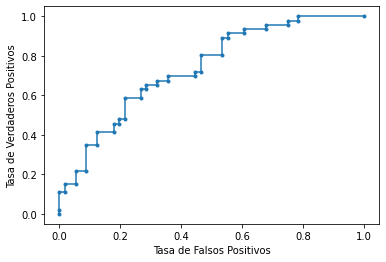

In [51]:
# Generar la gráfica
plt.plot(x_roc, y_roc, marker = '.', label = 'Curva ROC modelo de Regresión logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')

In [52]:
reg_model.predict_proba(X_test[col_final])[:, 1]

array([0.92884061, 0.70371425, 0.08551795, 0.31602962, 0.13360841,
       0.98267887, 0.24891477, 0.54081383, 0.04698479, 0.2366542 ,
       0.76099768, 0.54634925, 0.41270471, 0.8484087 , 0.10234225,
       0.65533577, 0.31806053, 0.14115685, 0.45192406, 0.47995744,
       0.39747288, 0.0011868 , 0.24898277, 0.08397984, 0.00577041,
       0.49091116, 0.59307265, 0.31296221, 0.70972848, 0.64605802,
       0.49371426, 0.6423967 , 0.88179115, 0.49706597, 0.54937226,
       0.55548652, 0.72148035, 0.55733877, 0.39579105, 0.3755867 ,
       0.27473793, 0.53399195, 0.1073438 , 0.09104653, 0.02408724,
       0.80243268, 0.58463635, 0.77193057, 0.34379191, 0.93351326,
       0.65938406, 0.10900633, 0.34709245, 0.20465079, 0.92677266,
       0.66137818, 0.12032784, 0.0688917 , 0.11332533, 0.34946959,
       0.48561389, 0.53508775, 0.94858819, 0.34551107, 0.29990376,
       0.62011731, 0.47270485, 0.83644207, 0.60517986, 0.52343376,
       0.29183519, 0.72749633, 0.37992547, 0.33151289, 0.74739